In [90]:
import pandas as pd
import numpy as np

In [91]:
taxi_df = pd.read_parquet('data/yellow_tripdata_2024-01.parquet')

In [92]:
print(taxi_df.shape)
taxi_df.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


#### 2.Data Exploration

In [93]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [94]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID','DOLocationID','payment_type','total_amount']]

In [95]:
 taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

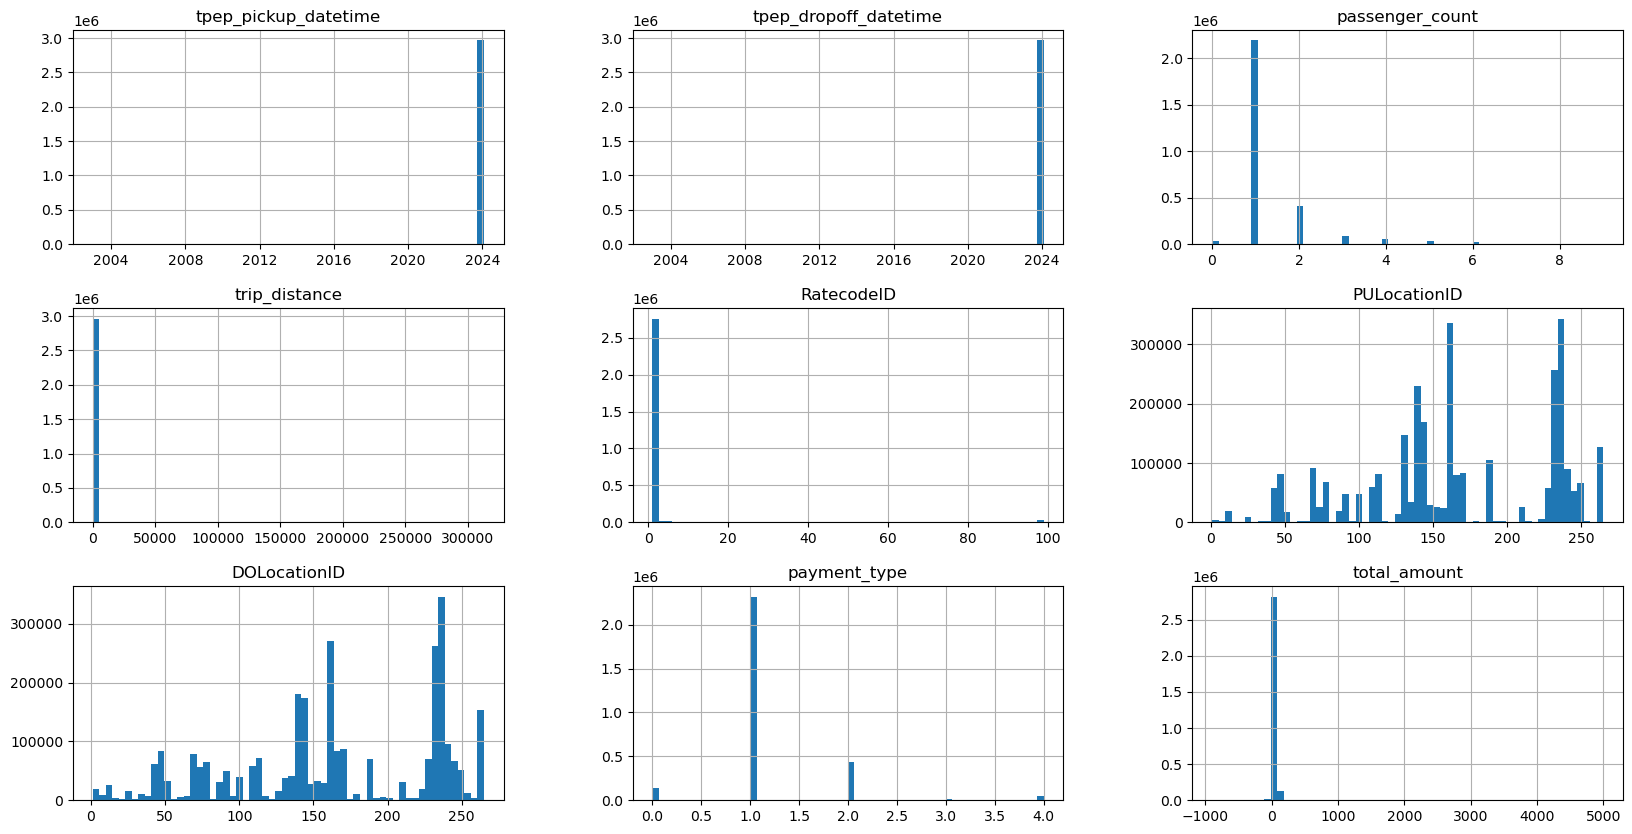

In [96]:
taxi_df.hist(figsize=(20,10),bins=60)

<Axes: xlabel='index', ylabel='total_amount'>

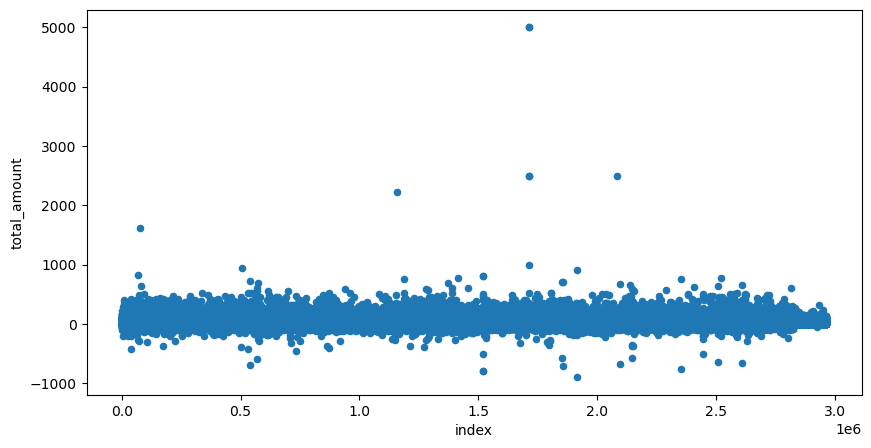

In [97]:
taxi_df.reset_index().plot(kind='scatter',y='total_amount', x = 'index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

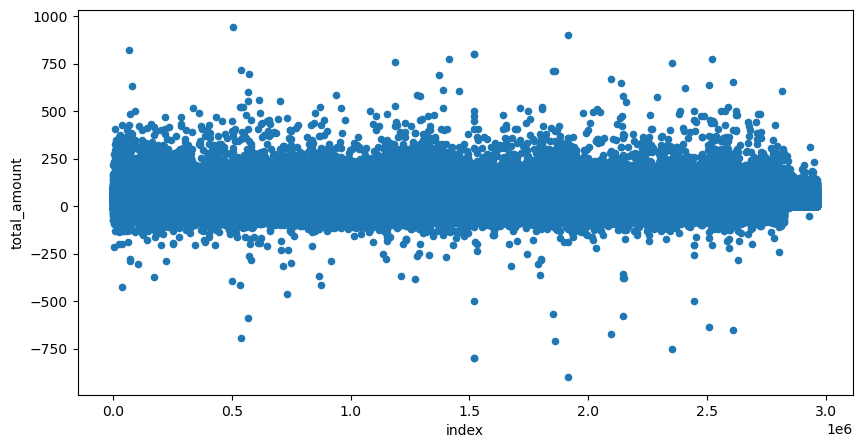

In [98]:
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind='scatter',y='total_amount', x = 'index', figsize=(10,5))

In [99]:
taxi_df[taxi_df['total_amount']<100]['trip_distance'].value_counts()

trip_distance
0.00        57234
0.90        40453
1.00        40186
0.80        39961
1.10        38658
            ...  
25.02           1
30.86           1
28.95           1
32.14           1
21235.88        1
Name: count, Length: 3208, dtype: int64

In [100]:
taxi_df['total_amount'].mean()

26.801504770925415

3. Data Cleaning

In [101]:
taxi_df.shape

(2964624, 9)

In [131]:
df = taxi_df[(taxi_df['total_amount']>=0)&(taxi_df['total_amount']<=250)]

In [103]:
print(taxi_df.shape)
df.shape

(2964624, 9)


(2928168, 9)

In [104]:
df.isnull().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140157
trip_distance                 0
RatecodeID               140157
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [105]:
df[df.isnull().any(axis=1)]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2824462,2024-01-01 00:34:19,2024-01-01 00:51:22,NaN,2.04,NaN,143,141,0,16.72
2824463,2024-01-01 00:14:31,2024-01-01 00:19:29,NaN,1.60,NaN,236,238,0,17.16
2824464,2024-01-01 00:35:11,2024-01-01 01:13:40,NaN,0.00,NaN,142,79,0,25.01
2824465,2024-01-01 00:33:37,2024-01-01 00:50:34,NaN,0.00,NaN,237,4,0,21.79
2824466,2024-01-01 00:49:04,2024-01-01 01:01:16,NaN,0.00,NaN,244,50,0,38.65
...,...,...,...,...,...,...,...,...,...
2964619,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,107,263,0,21.77
2964620,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,114,236,0,25.74
2964621,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,211,25,0,23.97
2964622,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,107,13,0,33.46


In [132]:
# Filter rows where both 'passenger_count' and 'RatecodeID' are null
missing_both = df[df['passenger_count'].isnull() & df['RatecodeID'].isnull()]

# Display the rows with both columns missing
print(missing_both)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2824462  2024-01-01 00:34:19   2024-01-01 00:51:22              NaN   
2824463  2024-01-01 00:14:31   2024-01-01 00:19:29              NaN   
2824464  2024-01-01 00:35:11   2024-01-01 01:13:40              NaN   
2824465  2024-01-01 00:33:37   2024-01-01 00:50:34              NaN   
2824466  2024-01-01 00:49:04   2024-01-01 01:01:16              NaN   
...                      ...                   ...              ...   
2964619  2024-01-31 23:45:59   2024-01-31 23:54:36              NaN   
2964620  2024-01-31 23:13:07   2024-01-31 23:27:52              NaN   
2964621  2024-01-31 23:19:00   2024-01-31 23:38:00              NaN   
2964622  2024-01-31 23:07:23   2024-01-31 23:25:14              NaN   
2964623  2024-01-31 23:58:25   2024-02-01 00:13:30              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
2824462           2.04         NaN           143           141     

4. Data Preparation

In [133]:
df_prepared = df.copy()
df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [135]:
 df_prepared = df_prepared.dropna()

In [136]:
df_prepared.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [137]:
df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [138]:
df_prepared['passenger_count'] = df_prepared['passenger_count'].astype(int)

In [140]:
df_prepared['RatecodeID'] = df_prepared['RatecodeID'].astype(str)
df_prepared.loc[:,'PULocationID'] = df_prepared['PULocationID'].astype(str)
df_prepared.loc[:,'DOLocationID'] = df_prepared['DOLocationID'].astype(str)
df_prepared['payment_type'] = df_prepared['payment_type'].astype(str)


In [141]:
df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [142]:
df_prepared['transaction_date'] = pd.to_datetime(df_prepared['tpep_pickup_datetime'].dt.date)
# -> we make it datetime again because it's very little use when it's just a string (can't compare,sort, etc.0
df_prepared['transaction_year'] = df_prepared['tpep_pickup_datetime'].dt.year
df_prepared['transaction_month'] = df_prepared['tpep_pickup_datetime'].dt.month
df_prepared['transaction_day'] = df_prepared['tpep_pickup_datetime'].dt.day
df_prepared['transaction_hour'] = df_prepared['tpep_pickup_datetime'].dt.hour

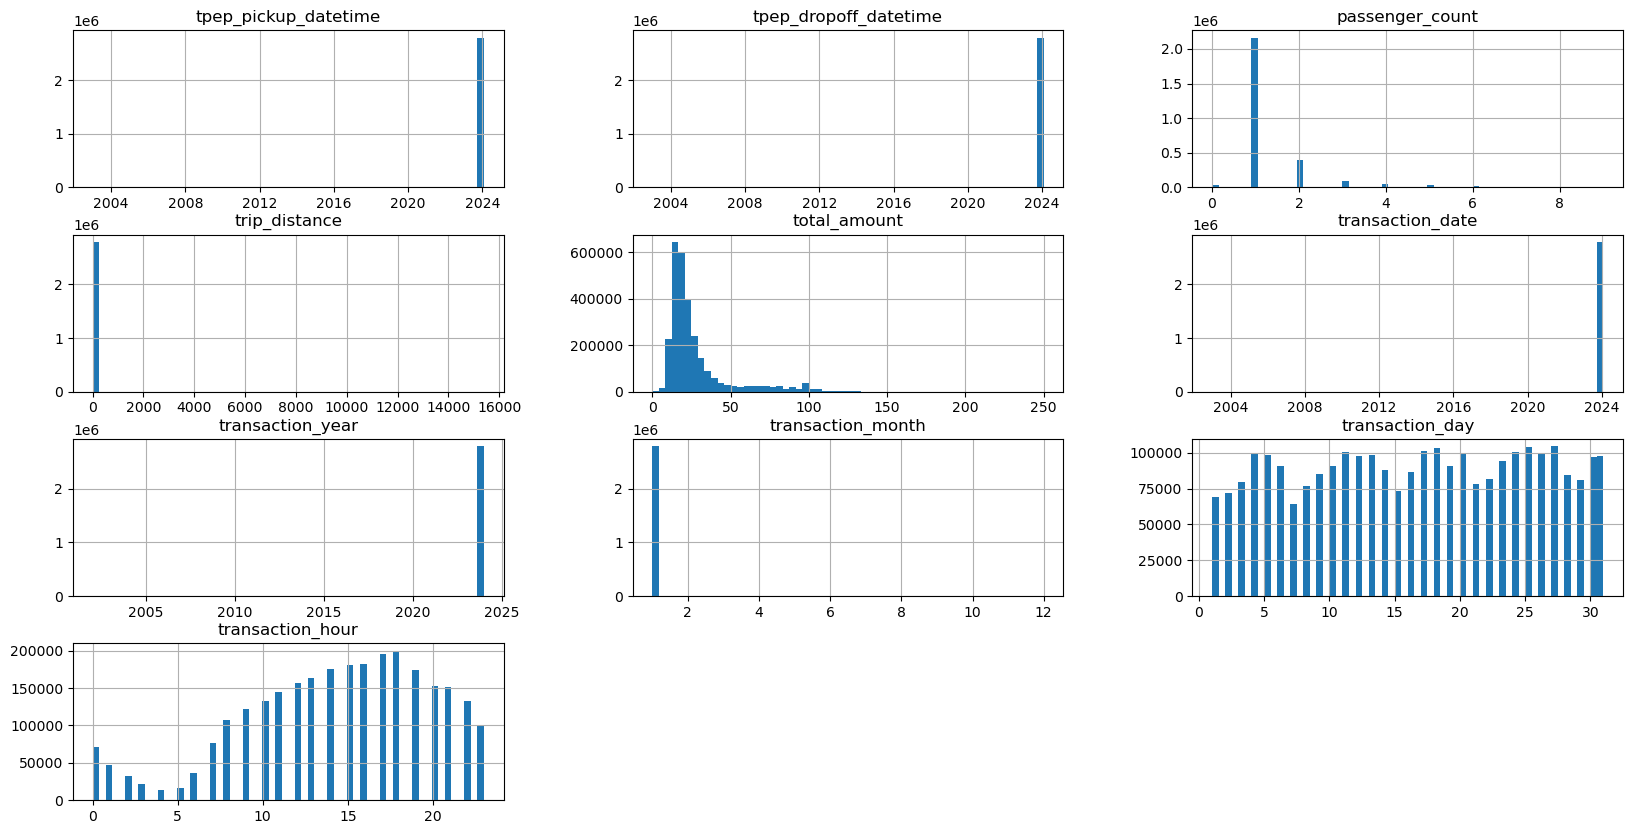

In [143]:
import matplotlib.pyplot as plt
df_prepared.hist(figsize=(20,10), bins=60)
plt.show()

In [144]:
df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour


In [145]:
categorical_column = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_colum = ['trip_distance','total_amount']
all = categorical_column + numerical_colum

In [146]:
main_taxi_df = df_prepared[all]
print(main_taxi_df.shape)
main_taxi_df.head()

(2788011, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


Aggregate data Points
Now is a good time about what we want to predict. Depending on this, we need to transfer our data to have a certain format

In [150]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_column).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_column).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(72003, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


<Axes: >

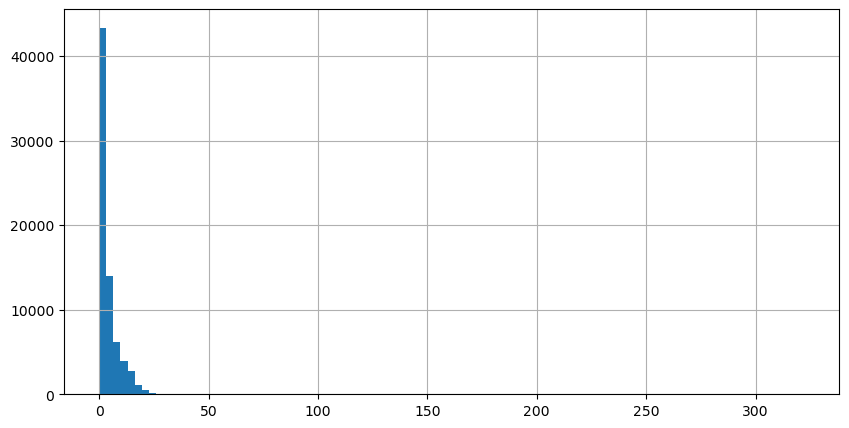

In [152]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<Axes: >

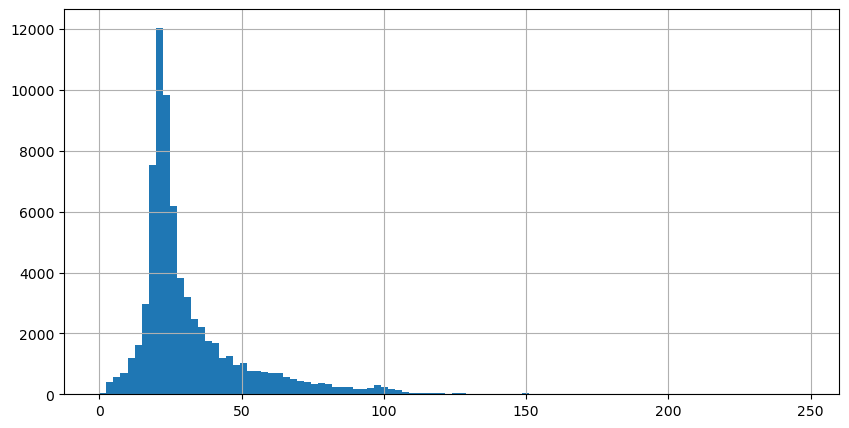

In [153]:
taxi_grouped_by_region['total_amount'].hist(bins=100,figsize=(10,5))

5. Benchmark Model

In [156]:
data_for_benchmark = taxi_grouped_by_region.copy()
data_for_benchmark.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [166]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_feature = categorical_features_benchmark + ['trip_distance']
target_feature = 'total_amount'

5.1 Train-test split

In [167]:
from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark[input_feature]
y_bench = data_for_benchmark[target_feature]

# one-hot encode

X_bench = pd.get_dummies(x_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

In [168]:
print(X_train_b.dtypes)


transaction_month      int32
transaction_day        int32
transaction_hour       int32
trip_distance        float64
PULocationID_1          bool
                      ...   
PULocationID_94         bool
PULocationID_95         bool
PULocationID_96         bool
PULocationID_97         bool
PULocationID_98         bool
Length: 259, dtype: object


5.2 Fit a model to the data

In [169]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

5.3 Model Evaluation

In [175]:
from math import sqrt

model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b,y_pred_b)))
print('r2', r2_score(y_test_b,y_pred_b))

mean_absolute_error 6.5410621701757234
mean_squared_error 179.41551688548194
root_mean_squared_error 13.39460775407335
r2 0.581124649107833


<Axes: xlabel='true', ylabel='pred'>

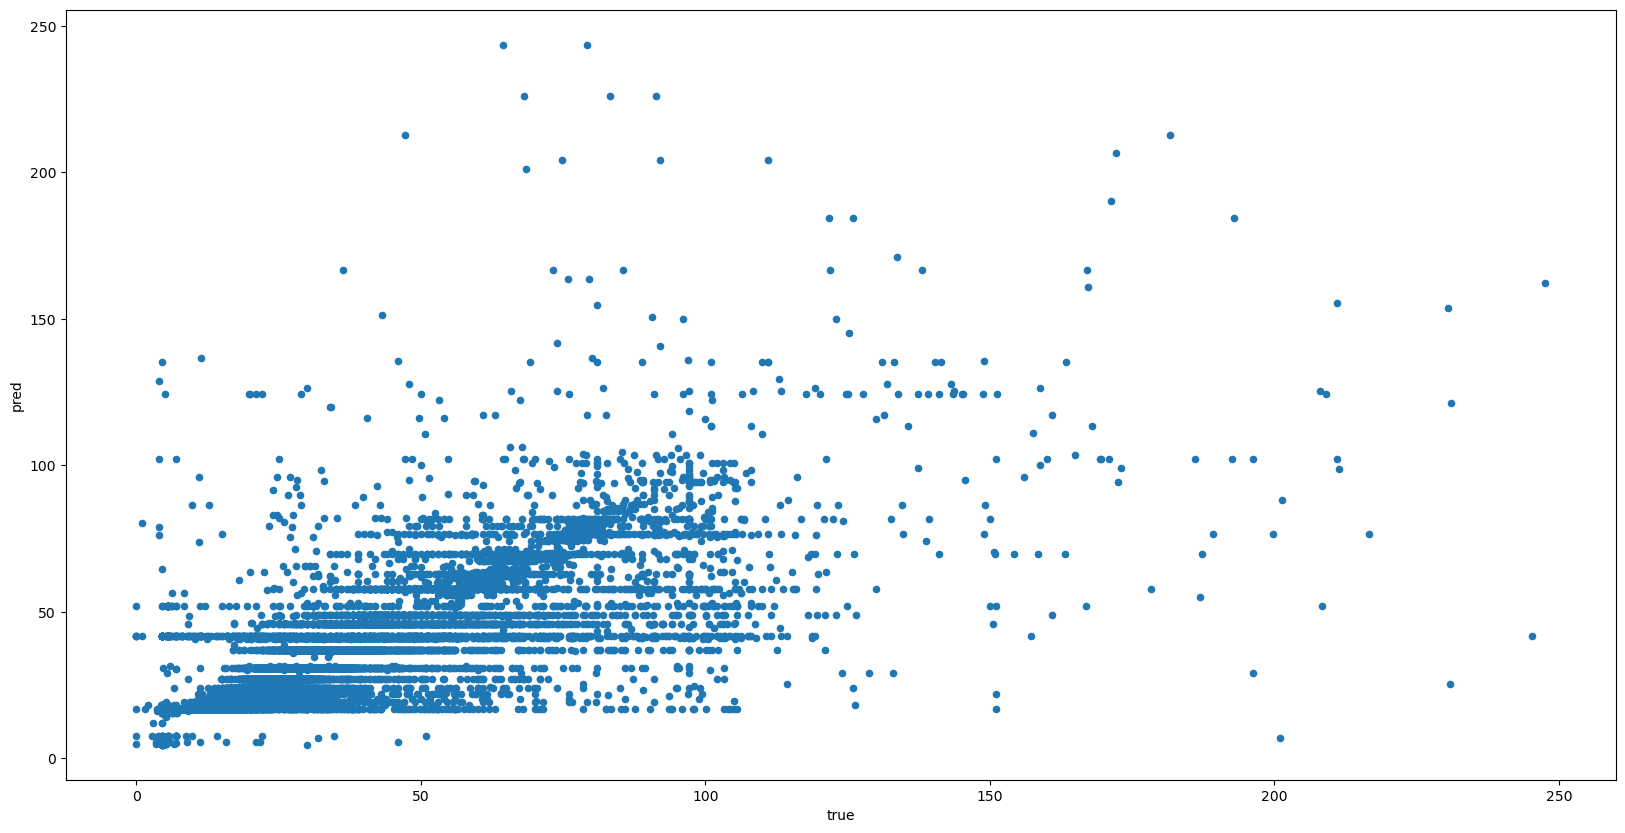

In [179]:
data = {'true':y_test_b, 'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind = 'scatter', x = 'true', y='pred')

In [181]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_feature = categorical_features_benchmark
target_feature = 'total_amount'


from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark[input_feature]
y_bench = data_for_benchmark[target_feature]

# one-hot encode

X_bench = pd.get_dummies(x_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)




from math import sqrt

model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b,y_pred_b)))
print('r2', r2_score(y_test_b,y_pred_b))

mean_absolute_error 11.725338048557196
mean_squared_error 324.960299508089
root_mean_squared_error 18.02665525015911
r2 0.24132615815299674


<Axes: xlabel='true', ylabel='pred'>

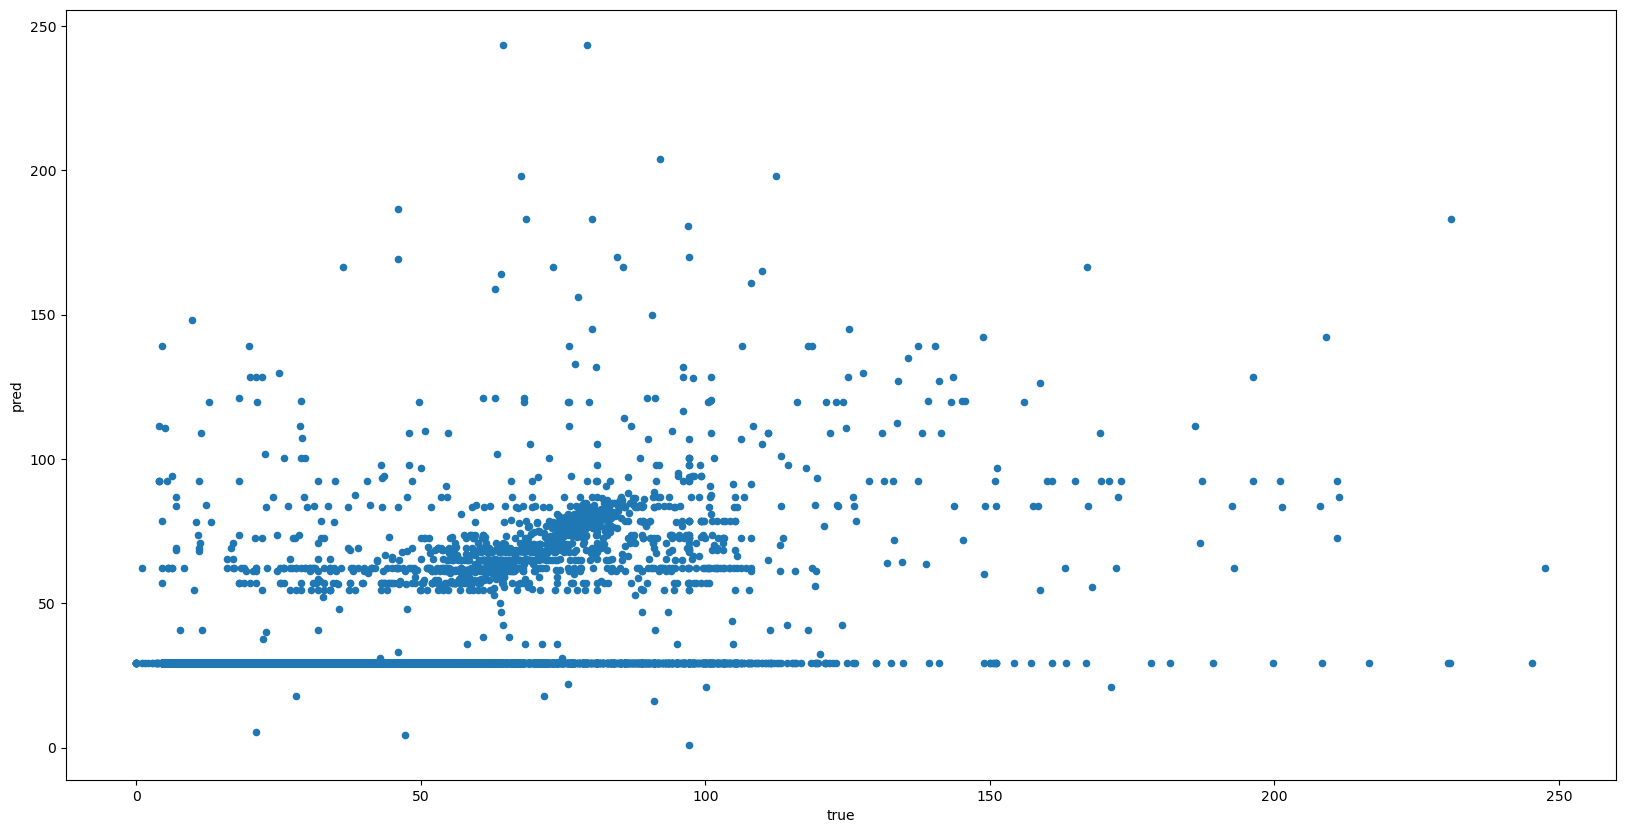

In [182]:
data = {'true':y_test_b, 'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind = 'scatter', x = 'true', y='pred')

6. Feature Engineering

In [183]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [184]:
data_new_features = taxi_grouped_by_region.copy()

Data-related features

In [185]:
data_new_features['transaction_weekday'] = data_new_features['transaction_date'].dt.weekday
data_new_features['weekend'] = data_new_features['transaction_date'].apply(lambda x: True if x==5 or x==6 else False)

In [187]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2023', end='2025').date
data_new_features['is_holiday'] = data_new_features['transaction_date'].isin(holidays)

/var/folders/nx/phq078l927sc0_r2jb8f_f840000gn/T/ipykernel_55395/3488739431.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_new_features['is_holiday'] = data_new_features['transaction_date'].isin(holidays)


In [189]:
data_new_features.tail()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_weekday,weekend,is_holiday
71998,98,2024-01-30,1,30,5,14.60,60.97,2,1,False,False
71999,98,2024-01-31,1,31,5,12.50,51.00,1,2,False,False
72000,98,2024-01-31,1,31,10,17.10,67.94,1,2,False,False
72001,98,2024-01-31,1,31,12,0.60,10.10,1,2,False,False
72002,98,2024-01-31,1,31,17,4.15,24.50,1,2,False,False


Borough information

In [190]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

In [193]:
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [195]:
data_new_features = data_new_features.merge(zone_lookup, left_on='PULocationID',right_on='LocationID', how='left')
data_new_features.drop('LocationID', axis=1, inplace=True)
data_new_features.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_weekday,weekend,is_holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True,EWR


In [196]:
data_new_features['Borough'].value_counts()

Borough
Manhattan        41388
Queens           13476
Brooklyn         11119
Bronx             4533
Unknown            721
EWR                183
Staten Island       45
Name: count, dtype: int64

Weather related features

7. Model training

In [201]:
data_for_model = data_new_features.copy()

In [204]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_weekday', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features
target_feature = 'total_amount'


train-test split

In [205]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

7.1. Decision tree


In [207]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [210]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('mean_absolute_error', mean_absolute_error(y_test,y_pred))
print('mean_squared_error', mean_squared_error(y_test,y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score', r2_score(y_test,y_pred))

mean_absolute_error 10.046663473981525
mean_squared_error 288.8564239904329
root_mean_squared_error 16.995776651581206
r2_score 0.32561665759557334


<Axes: xlabel='true', ylabel='pred'>

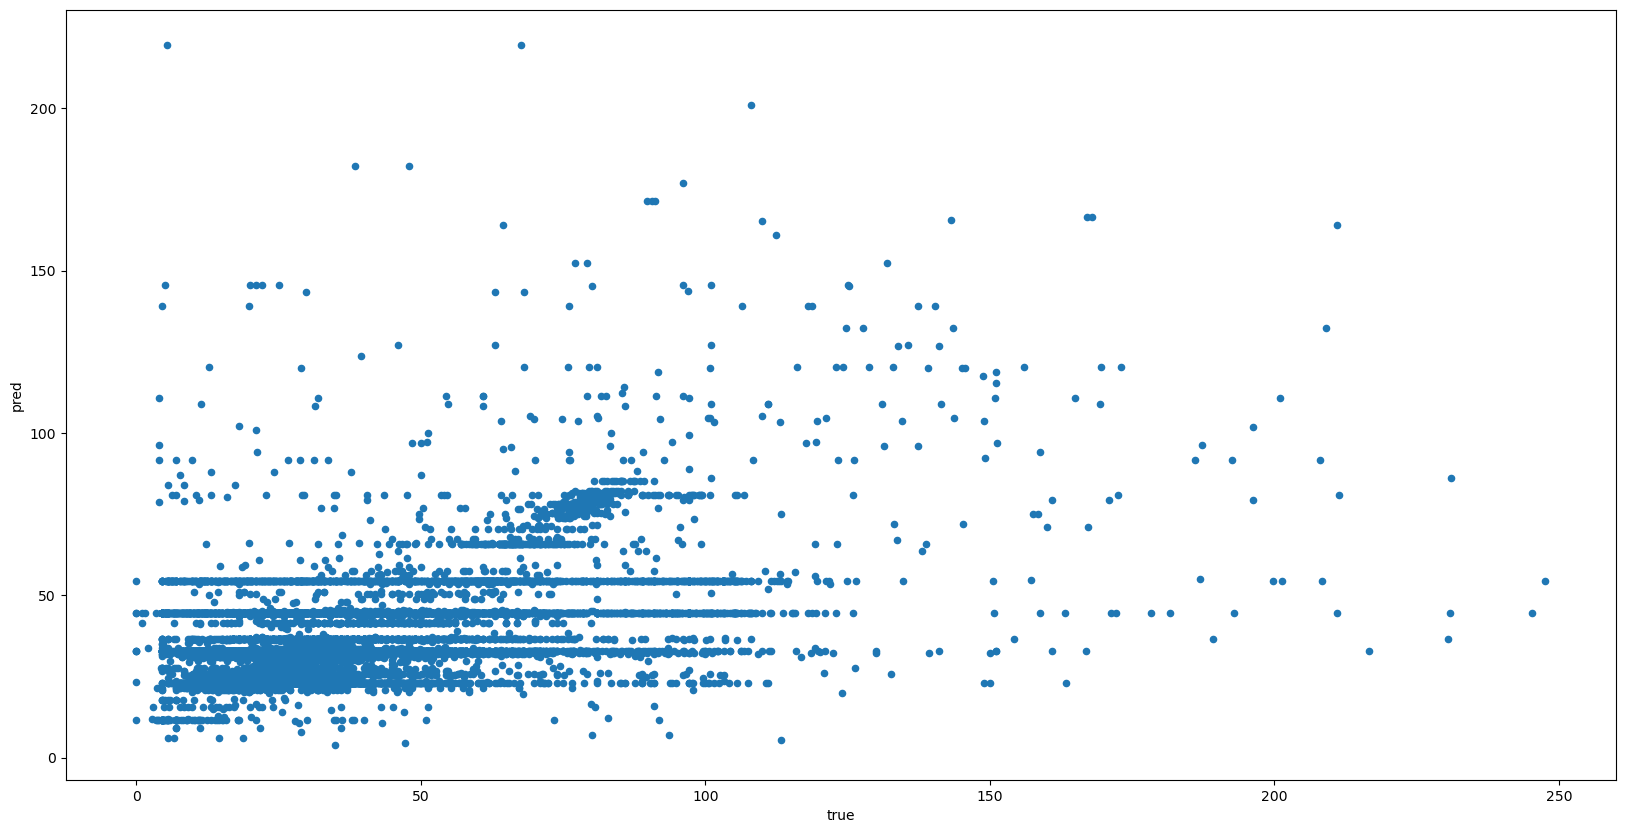

In [211]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')


Overfit

The model fits the training data's pattern so much that it loses the ability to generalise.

In [213]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [214]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [215]:
pd.DataFrame.from_dict(rmse_scores)


,max_depth,rmse_train,rmse_test
0,2,1.866555e+01,18.457874
1,5,1.723835e+01,17.374461
2,8,1.644185e+01,16.986368
3,10,1.580399e+01,16.967297
4,15,1.414467e+01,17.422353
5,20,1.264437e+01,17.923639
6,30,9.893497e+00,19.202733
7,50,4.465636e+00,20.929270
8,70,6.251143e-01,21.313575
9,100,1.617512e-17,21.344645


Text(0, 0.5, 'root mean squared error')

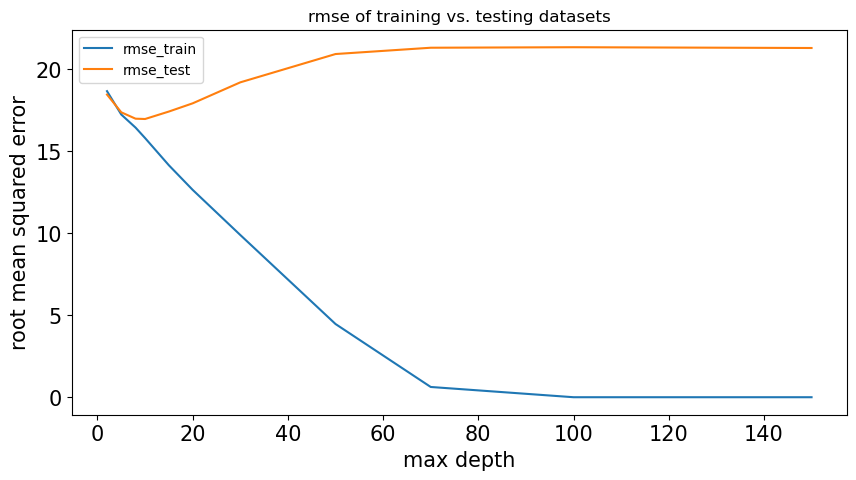

In [216]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)


Underfit


Underfit is when the model cannot capture the data's pattern at all



In [217]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [226]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=10)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))


mean_absolute_error 9.570689849075881
mean_squared_error 249.76611302184082
root_mean_squared_error 15.80399041450737
r2 0.43308038459571585


In [227]:

# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 10.036638927679194
mean_squared_error 287.3935452845606
root_mean_squared_error 16.952685488870507
r2 0.32903199112899384


7.2. Random forest


In [231]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [230]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.25014200166107
mean_squared_error 271.661977856569
root_mean_squared_error 16.482171515202996
r2 0.36575995056568944


<Axes: xlabel='true', ylabel='pred'>

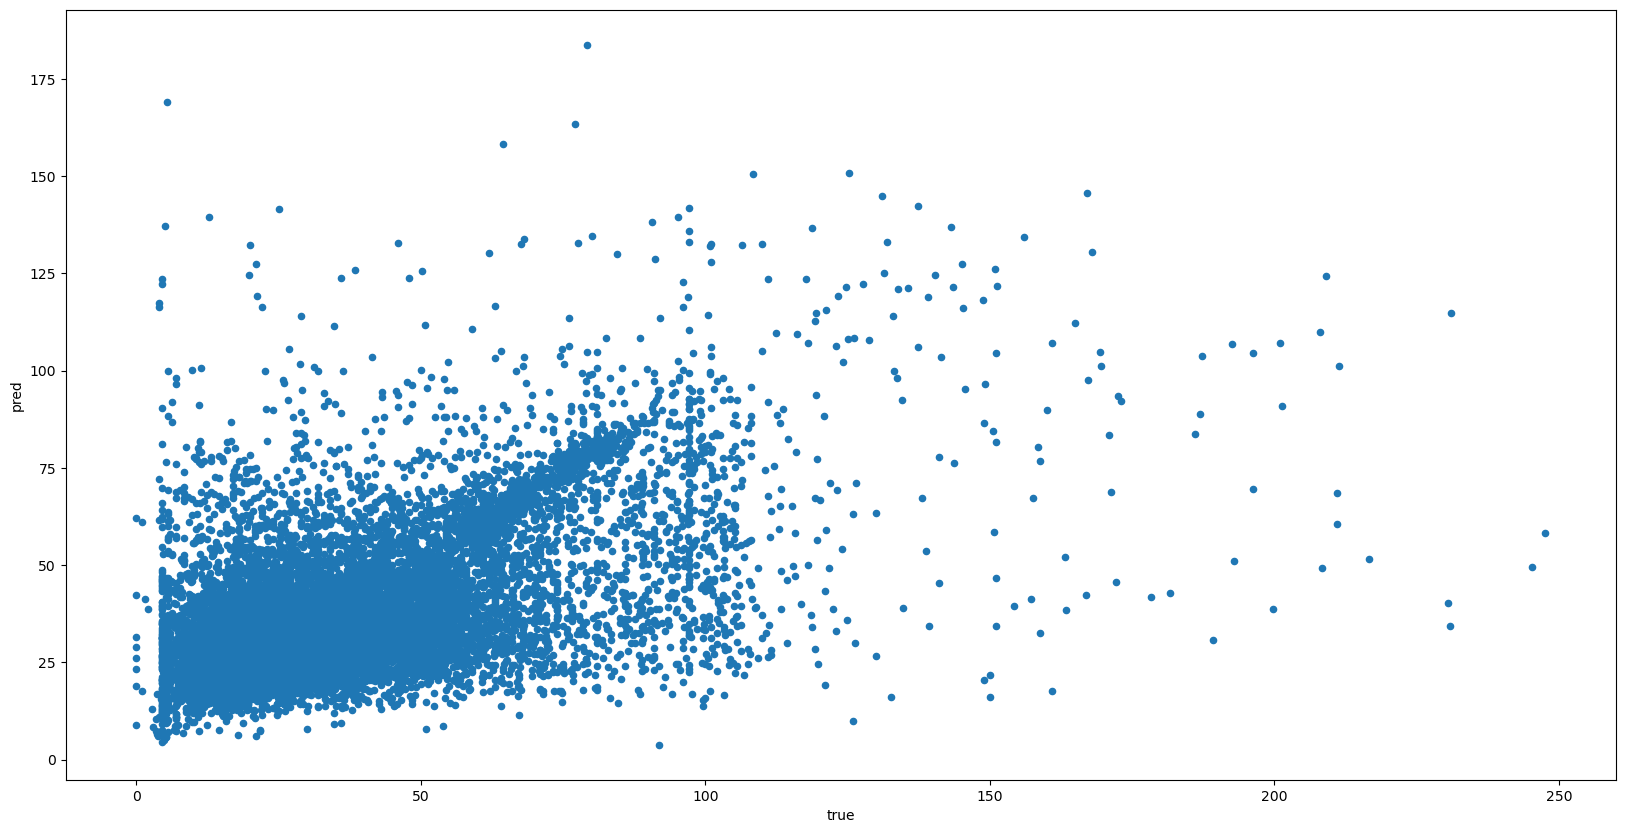

In [232]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

7.3. Gradient boosting


In [233]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)


GradientBoostingRegressor()

In [234]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.92951051283591
mean_squared_error 260.0084957500035
root_mean_squared_error 16.124778936469284
r2 0.39296694186298586


<Axes: xlabel='true', ylabel='pred'>

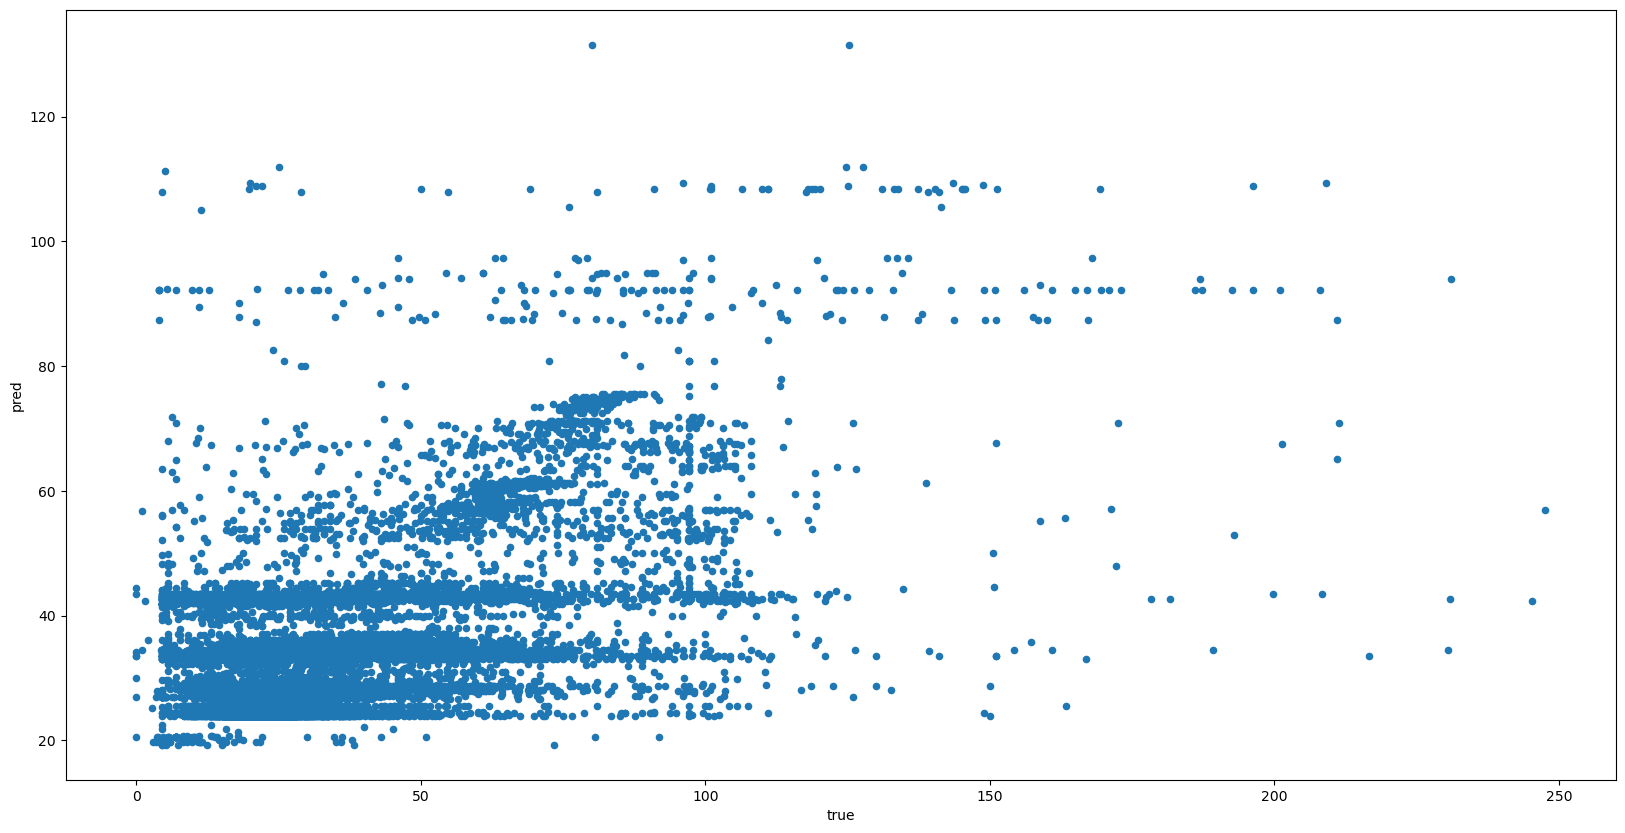

In [235]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

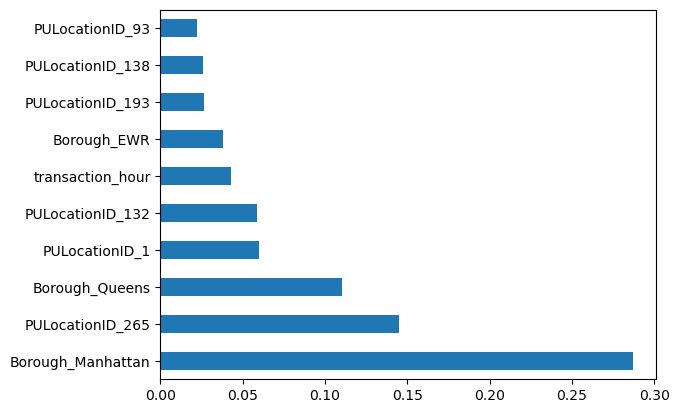

In [236]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 


8. Tuning

8.1. Find best parameters

In [238]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [240]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [241]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-packag

In [242]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,29.345718,0.417475,1.790947,0.069686,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.452799,0.407769,0.441365,0.433978,0.019111,2
1,9.352679,0.135418,0.407261,0.016023,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.420652,0.375014,0.400548,0.398738,0.018675,5
2,12.206499,0.175542,0.391845,0.014523,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.418216,0.377999,0.398213,0.398143,0.016418,6
3,0.025091,0.003661,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.026637,0.006122,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,159.036241,0.464961,21.266510,0.578622,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.416834,0.374304,0.405918,0.399018,0.018035,4
6,27.864673,0.372011,0.855967,0.130196,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.325159,0.295849,0.311131,0.310713,0.011970,7
7,85.692176,0.496433,4.951107,0.453618,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.456555,0.406493,0.434161,0.432403,0.020475,3
8,0.020404,0.009458,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,63.071663,12.822384,3.466191,0.635153,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.466019,0.420626,0.450839,0.445828,0.018867,1


[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  31.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   9.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time=  12.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=1400; total time=  28.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_

In [245]:

import time
t0= time.time()

best = RandomForestRegressor(n_estimators=600,min_samples_split= 10,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  29.277714014053345  seconds
mean_absolute_error 9.012955567821821
mean_squared_error 240.5311946196515
root_mean_squared_error 15.509068141563228
r2 0.4384399393329653


In [246]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  10.145008087158203  seconds
mean_absolute_error 8.930628045902091
mean_squared_error 239.7903944183702
root_mean_squared_error 15.48516691606423
r2 0.44016946055632056


<Axes: xlabel='true', ylabel='pred'>

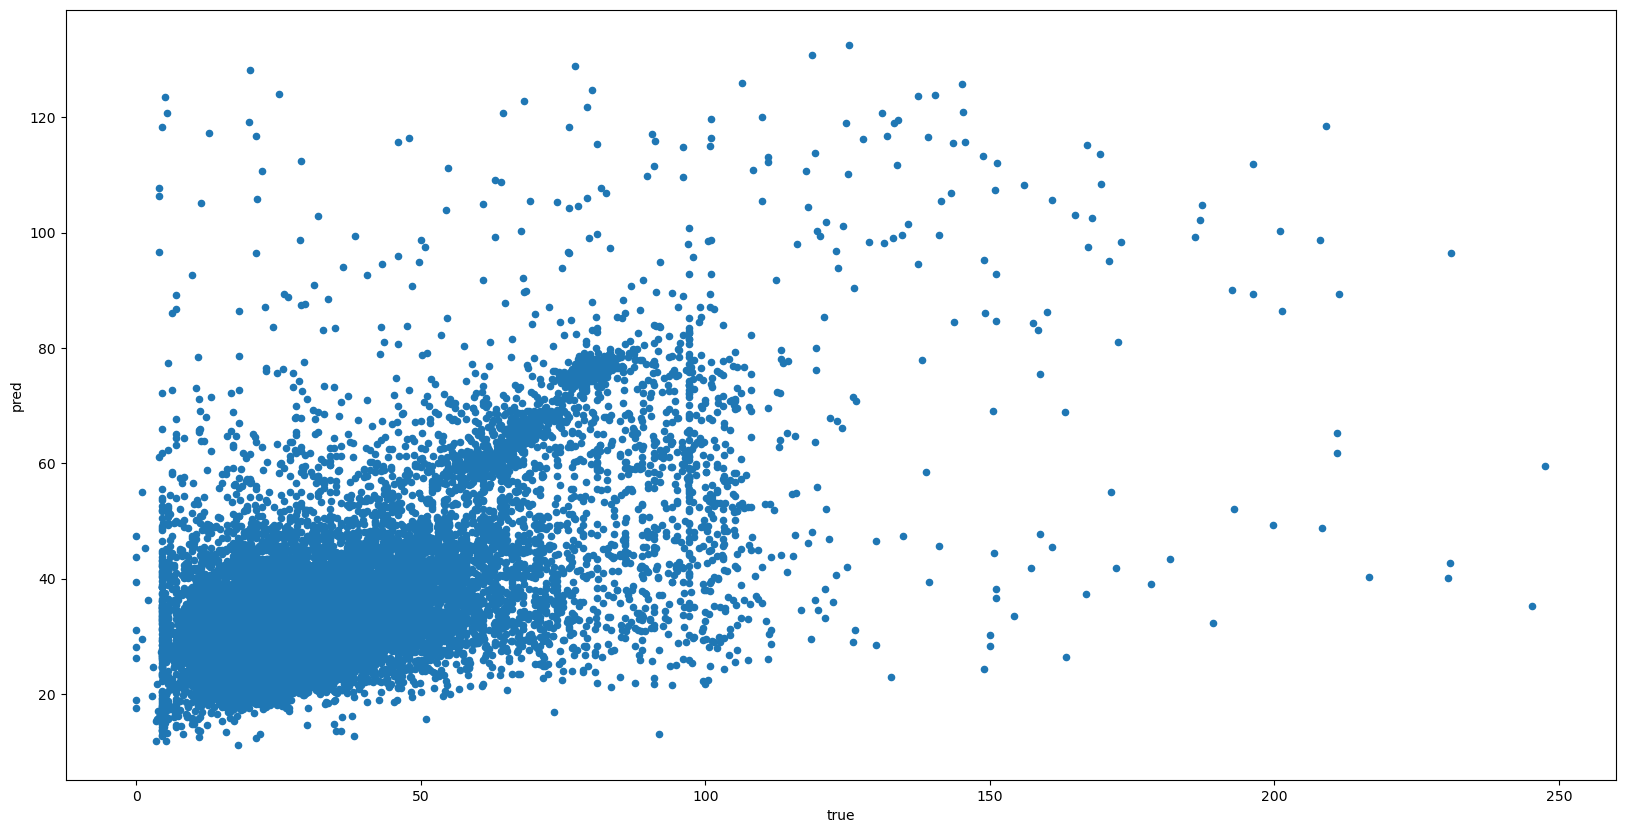

In [249]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

Bonus: Classification
